In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys 
sys.path.append('src')

from manageProjections import *
from op_basis_utils import *
from plotting import *

import FiniteVolumeGroups as fvg
import pickle

import matplotlib.pyplot as plt

pTot = sp.Matrix([0,0,0])
momStr='P000'
group = fvg.cubic.Oh()

import math

mrho = 789*0.121/197
mpi  = 0.1931

L=24
eta=1.0
Emax=5.5
ensemble='L2448'

In [3]:
print('rhopi   cut=2   ---> ',EN_rhopi([2,0,0],[-2,0,0],mrho,mpi,L,eta))
print('threepi cut=2 ---> ',EN_threepi([2,0,0],[-2,0,0],[0,0,0],mpi,L,eta))
print('threepi cut=2 ---> ',EN_threepi([2,0,0],[-1,0,0],[-1,0,0],mpi,L,eta))

rhopi   cut=2   --->  6.584764557413239
threepi cut=2 --->  6.780124721912117
threepi cut=2 --->  6.259403609659564


In [4]:
t=Timer()
t.start('rho-pi')
rhopiResults = get_rhopi_results(group,pTot,1,5,mrho,mpi,L,eta)
t.stop()

rho-pi: took  97.4184 seconds


In [5]:
t=Timer()
t.start('three-pi')
threepiResults = get_threepi_results(group,pTot,1,5.4,mpi,L,eta,timed=True)
t.stop()

[[-1 -1  0],[0 0 0],[1 1 0]]
[[-1 -1  0],[1 1 0],[0 0 0]]
[[-1  0 -1],[0 0 0],[1 0 1]]
[[-1  0 -1],[1 0 1],[0 0 0]]
[[-1  0  0],[0 0 0],[1 0 0]]
[[-1  0  0],[1 0 0],[0 0 0]]
[[-1  0  1],[0 0 0],[1 0 -1]]
[[-1  0  1],[ 1  0 -1],[0 0 0]]
[[-1  1  0],[0 0 0],[1 -1 0]]
[[-1  1  0],[ 1 -1  0],[0 0 0]]
[[ 0 -1 -1],[0 0 0],[0 1 1]]
[[ 0 -1 -1],[0 1 1],[0 0 0]]
[[ 0 -1  0],[0 0 0],[0 1 0]]
[[ 0 -1  0],[0 1 0],[0 0 0]]
[[ 0 -1  1],[0 0 0],[0 1 -1]]
[[ 0 -1  1],[ 0  1 -1],[0 0 0]]
[[ 0  0 -1],[0 0 0],[0 0 1]]
[[ 0  0 -1],[0 0 1],[0 0 0]]
[[0 0 0],[-1 -1  0],[1 1 0]]
[[0 0 0],[-1  0 -1],[1 0 1]]
[[0 0 0],[-1  0  0],[1 0 0]]
[[0 0 0],[-1  0  1],[1 0 -1]]
[[0 0 0],[-1  1  0],[1 -1 0]]
[[0 0 0],[ 0 -1 -1],[0 1 1]]
[[0 0 0],[ 0 -1  0],[0 1 0]]
[[0 0 0],[ 0 -1  1],[0 1 -1]]
[[0 0 0],[ 0  0 -1],[0 0 1]]
[[0 0 1],[ 0  0 -1],[0 0 0]]
[[0 0 1],[0 0 0],[0 0 -1]]
[[ 0  1 -1],[ 0 -1  1],[0 0 0]]
[[ 0  1 -1],[0 0 0],[0 -1 1]]
[[0 1 0],[ 0 -1  0],[0 0 0]]
[[0 1 0],[0 0 0],[0 -1 0]]
[[0 1 1],[ 0 -1 -1],[0 0 0]]

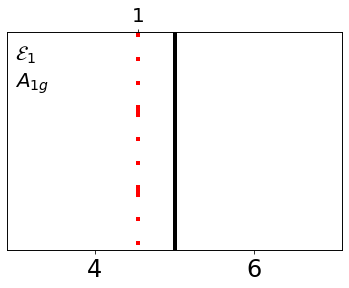

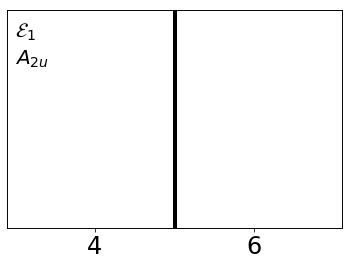

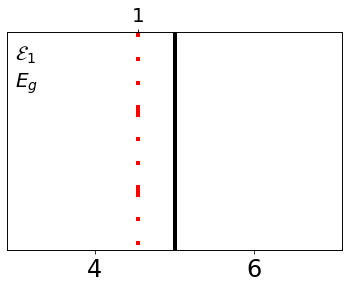

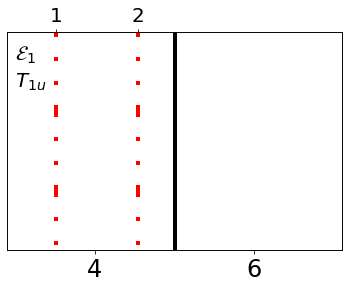

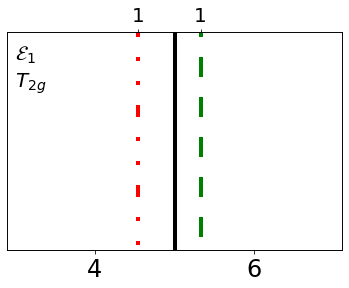

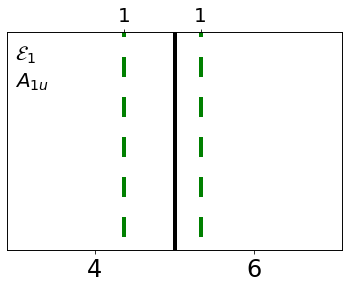

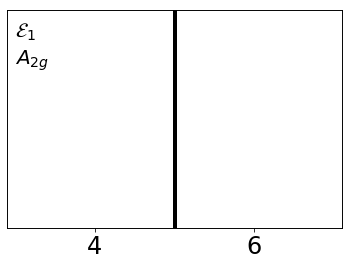

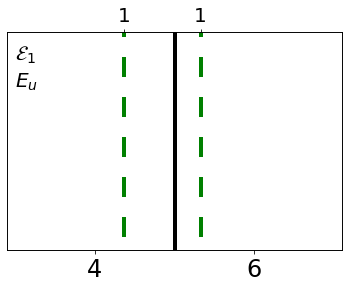

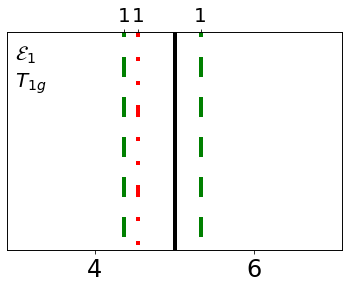

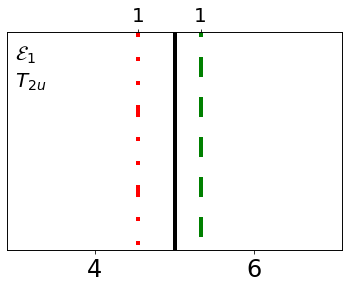

In [10]:
def latexIrrep(irrep):
    return '$' + irrep[0]+'_{' + irrep[1:] + '}$'

for irrep in group.elements[0].irreps:
    nonint_plt(rhopiResults,threepiResults,irrep)

    plt.text(3.0,0.8,'$\\mathcal{E}_1$',fontsize=20)
    plt.text(3.0,0.7,latexIrrep(irrep),fontsize=20)
    plt.show()